# INTELIGENCIA ARTIFICIAL
## Tarea 1: implementacion de gradiente descendiente
### Hecho por: Juan Sebastián Clavijo Martínez<br />
TEMA: Usar el dataset sobre finca raiz en taiwan para hacer una implementación de gradiente descendiente<br />
Fecha: 11-08-2024<br />
Notas: Nada por ahora<br />
**Pontificia Universidad Javeriana**

## 1. preprocesamiento de datos

In [224]:
# Importado de bibliotecas pertinentes
# se usa el #type: ignore para que mi vscode genere warnings sobre la resolucion de dependencias de los pkts

import pandas as pd  # tratamiento de datos en un dataframe
import numpy as np  # numerical python
import seaborn as sns  # biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt  # biblioteca para vizualizacion de datos
import ipywidgets as widgets  # widgets interactivos, barras deslizantes, etc, para mas info mirar: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#file-upload
from IPython.display import display # display interactivo
from ucimlrepo import fetch_ucirepo  # se traen los datos del repositorio, para mas info revisar: https://github.com/uci-ml-repo/ucimlrepo (el dataset tiene el id=447)

In [225]:
# Parte 1.1: carga de datos
# se trae el dataset
url = 'https://archive.ics.uci.edu/static/public/477/data.csv'
# se hace el obj dataframe
df_rev = pd.read_csv(url) ##Se llama así por Real Estate Valuation
# se presentan los primeros 5 renglones y la forma de los datos
df_rev.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [226]:
# Parte 1.2: limpieza y preparación de los datos (cuenta de datos null, etc. y limpieza)
desaparecidos = len(df_rev) - len(df_rev.dropna())
Cantidad = len(df_rev)
print("Cantidad de datos observados con datos NaN", desaparecidos)
print("Cantidad de datos duplicados", df_rev.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_rev.dropna(inplace=True)
df_rev.drop_duplicates(inplace=True)
# Se reinicia el indice por los elementos eliminados
df_rev.reset_index(drop=True, inplace=True)

Cantidad de datos observados con datos NaN 0
Cantidad de datos duplicados 0


## 2. Implementación de Gradiente Descendiente

In [227]:
# Parte 2.1 Gráfico interactivo con los datos sin implementar GD
df_rev_01 = df_rev.rename(
    columns={
        "X1 transaction date": "transaction date",
        "X2 house age": "house age",
        "X3 distance to the nearest MRT station": "distance to the nearest MRT station",
        "X4 number of convenience stores": "number of convenience stores",
        "X5 latitude": "latitude",
        "X6 longitude": "longitude",
        "Y house price of unit area": "house price of unit area",  # Renombrar la columna Y también
    }
)

# Eliminamos columnas que no serán usadas en el eje X
x_columns = df_rev_01.columns.drop(["house price of unit area", "No"])


# Función para graficar
def plot_graph(x_column):
    x = df_rev_01[x_column]
    y = df_rev_01["house price of unit area"]  # Nombre de columna corregido

    # Crear la figura con tamaño ajustado
    fig, ax = plt.subplots(
        figsize=(6.5, 6.5)
    )  # 6x6 pulgadas es aproximadamente 30% de una pantalla estándar

    ax.scatter(x, y, alpha=0.4, edgecolor="none")
    ax.set_xlabel(x_column)  # Corrección de eje X y Y
    ax.set_ylabel("house price of unit area [10k TWD/Ping (1 Ping = 3.3 m²)]")
    ax.set_title("Gráfica interactiva")

    plt.show()


# Creamos un menú desplegable para seleccionar la columna del eje X
x_dropdown = widgets.Dropdown(
    options=x_columns, value="house age", description="Eje X:"
)

# Mostramos el widget y la gráfica
widgets.interactive(plot_graph, x_column=x_dropdown)

interactive(children=(Dropdown(description='Eje X:', index=1, options=('transaction date', 'house age', 'dista…

### Flujo de GD
1. proponer el modelo lineal (la matriz A refleja la estruc del modelo)
2. definir un theta inicial aleatoriamente
3. estimar salida del modelo para ese theta h=A*theta
4. encontrar el error
5. actualizar el theta = theta - (alpha/m(numero de datos))xA^t*e
6. $y=mx+b$
7. goto 3 until convergence
    - crieterios de parada:
      - ubmral de error
      - no hay cambio en theta
- util: no actualizar h! solo se vuelve a calcular cuando se actualizan los parametros

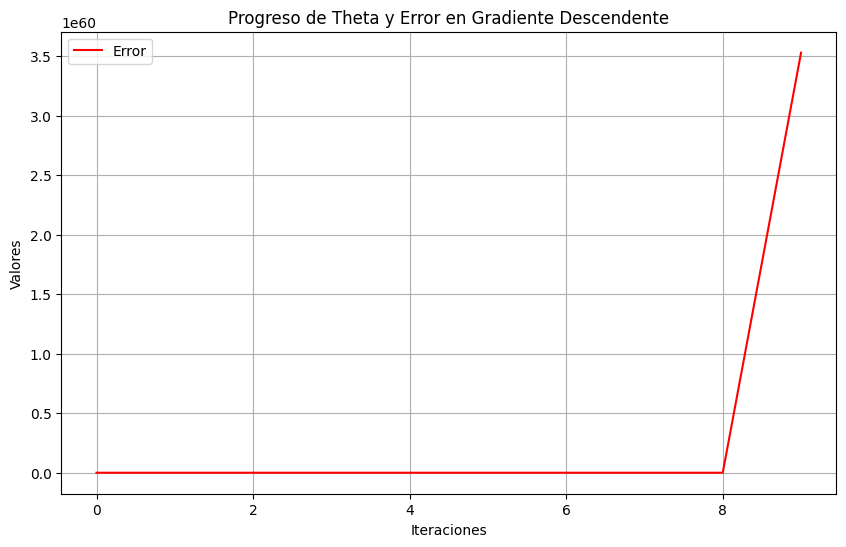

In [228]:
# Lista para almacenar los valores de theta y error en cada iteración
theta_values = []
error_values = []

# Parte 2.2 Implementación de GD
df_rev_01.rename(
    columns={"Y house price of unit area": "house price of unit area"}, inplace=True
)
df_rev_01.drop(columns=["No"], inplace=True)
df_rev_01["ones"] = 1


def calculo_h(theta):
    return df_rev_01.values @ theta


def calculo_error(h, y):
    return h - y.values


def gradiente_descendiente():
    theta = np.random.rand(df_rev_01.shape[1])
    alpha = 0.4
    iteraciones = 1000
    y = df_rev_01["house price of unit area"]
    m = df_rev_01.shape[0]

    for i in range(10):
        h = calculo_h(theta)
        e = calculo_error(h, y)
        theta = theta - ((alpha / m) * df_rev_01.values.T @ e)

        # Guardar los valores de theta y el error promedio (norma del error)
        theta_values.append(np.linalg.norm(theta))
        error_values.append(np.mean(np.abs(e)))

# Ejecutar el gradiente descendiente
gradiente_descendiente()

# Graficar los valores de theta y error
plt.figure(figsize=(10, 6))
#plt.plot(theta_values, label="Theta", color="blue")
plt.plot(error_values, label="Error", color="red")
plt.xlabel("Iteraciones")
plt.ylabel("Valores")
plt.title("Progreso de Theta y Error en Gradiente Descendente")
plt.legend()
plt.grid(True)
plt.show()

# ACUMULAR LOS VALS DE THETA PARA GRAFICAR Y VER EVOLIUCION - grafica despues de la tarea del notebook de la clase